In [26]:
from sklearn import tree  
from sklearn.externals import joblib
import pydotplus
from sklearn.datasets import load_iris
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import itertools
#import graphviz 
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90,fontsize=16)
    plt.yticks(tick_marks, classes,fontsize=16)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=16)
    plt.xlabel('Predicted label',fontsize=16)
    return cm

def get_dataset(file_name,data_class_name_num,data_class_name):
    data = pd.read_csv(file_name)
    data = data.reset_index(drop=True)
    data = data.dropna()
    X = data.iloc[:,0:4]
    X = X.reset_index(drop=True)
    X = X.dropna()
    Y = data.iloc[:,-1]
    Y = Y.replace(data_class_name_num, data_class_name)
    Y = Y.reset_index(drop=True)
    Y = Y.dropna()

    min_max_scaler = preprocessing.MinMaxScaler()
    values = X.values
    values_scaled = min_max_scaler.fit_transform(values)
#     X = pd.DataFrame(values_scaled)
#     print(df.head())
    return X,Y

def calc_stat(clf,X,Y):
    score = clf.score(X,Y)
    y_true = Y;
    y_pred = clf.predict(X) 
    precision,recall,fbeta_score,support = precision_recall_fscore_support(y_true, 
                                                                       y_pred, 
                                                                       beta=1.0, 
                                                                       labels=None, 
                                                                       pos_label=1, 
                                                                       average=None, 
                                                                       warn_for=('precision', 'recall', 'f-score'), 
                                                                       sample_weight=None)
    return score,precision,recall,fbeta_score,support 


In [50]:
own_data = True
experiment = 1
no_off_class = 5
data_feature_names = [ 'altitude', 'vel_x', 'vel_y', 'vel_z' ]
data_class_name_num = [1, 2, 3, 4, 5]
data_class_name = ['Hold', 'Takeoff', 'Hover', 'Search', 'Land']

data_feature_names_gtri = [ 'roll', 'pitch', 'yaw', 'rollspeed','pitchspeed','yawspeed', 'xacc', 'yacc', 'zacc']
data_class_name_num_gtri = [0, 1, 2, 3]
data_class_name_gtri = ['Hold', 'Fly Orbit and Observe', 'Fly Search Pattern', 'Survey Target']


datagtri = pd.read_csv('GTRIdataset.csv')
datagtri = datagtri.dropna()
gtriX = datagtri.iloc[:,1:10]
gtriX = gtriX.reset_index(drop=True)
gtriX = gtriX.dropna()
gtriY = datagtri.iloc[:,10]
gtriY = gtriY.replace(data_class_name_num_gtri, data_class_name_gtri)
gtriY = gtriY.reset_index(drop=True)
gtriY = gtriY.dropna()


intelX,intelY = get_dataset('intelDroneData.csv',data_class_name_num,data_class_name)

print('Real Data intel: ', 'Hold: ', len(intelY[intelY=='Hold']),
      ' Takeoff: ', len(intelY[intelY=='Takeoff']),
      ' Hover: ', len(intelY[intelY=='Hover']),
      ' Search: ', len(intelY[intelY=='Search']),
      ' Land: ', len(intelY[intelY=='Land']),
      ' Total: ', len(intelY))

arX,arY = get_dataset('arDroneData.csv',data_class_name_num,data_class_name)

print('Real Data ar: ', 'Hold: ', len(arY[arY=='Hold']),
      ' Takeoff: ', len(arY[arY=='Takeoff']),
      ' Hover: ', len(arY[arY=='Hover']),
      ' Search: ', len(arY[arY=='Search']),
      ' Land: ', len(arY[arY=='Land']))

inarX,inarY = get_dataset('intelardata.csv',data_class_name_num,data_class_name)
inarsimX,inarsimY = get_dataset('intelarsimdata.csv',data_class_name_num,data_class_name)

simirisX,simirisY = get_dataset('datasetiris.csv',data_class_name_num,data_class_name)
simsoloX,simsoloY = get_dataset('datasetsolo.csv',data_class_name_num,data_class_name)
simX,simY = get_dataset('gazeboSimulationData.csv',data_class_name_num,data_class_name)

simconcatX = pd.concat([simirisX,simsoloX,intelX],axis=0)
simconcatY = pd.concat([simirisY,simsoloY,intelY],axis=0)

# simconcatX = pd.concat([simirisX,simsoloX],axis=0)
# simconcatY = pd.concat([simirisY,simsoloY],axis=0)

# simX,simY = simsoloX,simsoloY
# simX,simY = simirisX,simirisY
# simX,simY = simconcatX,simconcatY
print('Simulation Data: ', 'Hold: ', len(simY[simY=='Hold']),
      ' Takeoff: ', len(simY[simY=='Takeoff']),
      ' Hover: ', len(simY[simY=='Hover']),
      ' Search: ', len(simY[simY=='Search']),
      ' Land: ', len(simY[simY=='Land']),
      ' Total: ', len(simY))

print('Simulation iris Data: ', 'Hold: ', len(simirisY[simirisY=='Hold']),
      ' Takeoff: ', len(simirisY[simirisY=='Takeoff']),
      ' Hover: ', len(simirisY[simirisY=='Hover']),
      ' Search: ', len(simirisY[simirisY=='Search']),
      ' Land: ', len(simirisY[simirisY=='Land']),
      ' Total: ', len(simirisY))

print('Simulation solo Data: ', 'Hold: ', len(simsoloY[simsoloY=='Hold']),
      ' Takeoff: ', len(simsoloY[simsoloY=='Takeoff']),
      ' Hover: ', len(simsoloY[simsoloY=='Hover']),
      ' Search: ', len(simsoloY[simsoloY=='Search']),
      ' Land: ', len(simsoloY[simsoloY=='Land']),
      ' Total: ', len(simsoloY))

print('Simulation concat Data: ', 'Hold: ', len(simconcatY[simconcatY=='Hold']),
      ' Takeoff: ', len(simconcatY[simconcatY=='Takeoff']),
      ' Hover: ', len(simconcatY[simconcatY=='Hover']),
      ' Search: ', len(simconcatY[simconcatY=='Search']),
      ' Land: ', len(simconcatY[simconcatY=='Land']),
      ' Total: ', len(simconcatY))

Real Data:  Hold:  9862  Takeoff:  501  Hover:  1767  Search:  1251  Land:  598  Total:  13979
Simulation Data:  Hold:  3715  Takeoff:  795  Hover:  1185  Search:  8482  Land:  837  Total:  15014
Simulation iris Data:  Hold:  6323  Takeoff:  684  Hover:  6285  Search:  5597  Land:  995  Total:  19884
Simulation solo Data:  Hold:  11817  Takeoff:  1014  Hover:  4586  Search:  7122  Land:  1472  Total:  26011
Simulation concat Data:  Hold:  28002  Takeoff:  2199  Hover:  12638  Search:  13970  Land:  3065  Total:  59874


Train stat:
Accuracy:  0.9993319303871463
precision:  0.9994122664523595
recall:  0.9988010619214875
Fscore:  0.9991058497121044
support [ 4633 21453  2050 14447  4308]
Test stat:
Accuracy:  0.9885893710124595
precision:  [1.   0.97 0.99 0.98 0.98]
recall:  [1.   0.98 0.99 0.98 0.97]
Fscore:  [1.   0.98 0.99 0.98 0.98]
Intel stat:
Accuracy:  0.9973674797911152
precision:  [1.   0.99 1.   0.99 1.  ]
recall:  [1.   0.99 0.99 0.99 0.99]
Fscore:  [1.   0.99 0.99 0.99 0.99]
AR stat:
Accuracy:  0.41434390394745263
precision:  [0.55 0.67 0.28 0.38 0.53]
recall:  [9.58e-01 4.66e-04 8.20e-02 1.00e+00 8.54e-02]
Fscore:  [0.7  0.   0.13 0.56 0.15]
Iris stat:
Accuracy:  0.9926423254878293
precision:  [1.   0.99 0.99 0.99 0.99]
recall:  [1.   0.99 0.99 0.99 0.98]
Fscore:  [1.   0.99 0.99 0.99 0.99]
Solo stat:
Accuracy:  0.9931375187420706
precision:  [1.   0.98 1.   0.99 0.99]
recall:  [1.   0.99 0.99 0.99 0.98]
Fscore:  [1.   0.98 0.99 0.99 0.99]
Simulation testy Data:  Hold:  13966  Takeoff:  110

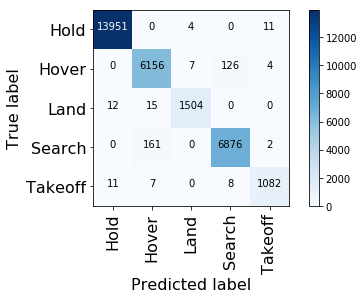

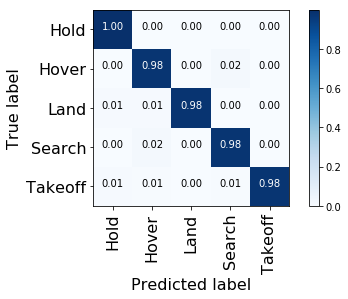

In [51]:
# # to test gtri data
# own_data = False
# dataX = gtriX
# dataY = gtriY
# data_feature_names = data_feature_names_gtri
# data_class_name = data_class_name_gtri

# # to test intel drone data
# dataX = intelX
# dataY = intelY

# # to test ar drone data
# dataX = arX
# dataY = arY

# #to test simulation data
dataX = simX
dataY = simY

# dataX = simirisX
# dataY = simirisY

# dataX = simsoloX
# dataY = simsoloY

#dataX = simconcatX
#dataY = simconcatY

# dataX=inarX
# dataY=inarY

# dataX=inarsimX
# dataY=inarsimY

Noofrun = 1

trainAccuracy = 0
trainPrecision = np.zeros(no_off_class)
trainRecall = np.zeros(no_off_class)
trainF1score = np.zeros(no_off_class)

testAccuracy = 0
testPrecision = np.zeros(no_off_class)
testRecall = np.zeros(no_off_class)
testF1score = np.zeros(no_off_class)

intelAccuracy = 0
intelPrecision = np.zeros(no_off_class)
intelRecall = np.zeros(no_off_class)
intelF1score = np.zeros(no_off_class)

arAccuracy = 0
arPrecision = np.zeros(no_off_class)
arRecall = np.zeros(no_off_class)
arF1score = np.zeros(no_off_class)

soloAccuracy = 0
soloPrecision = np.zeros(no_off_class)
soloRecall = np.zeros(no_off_class)
soloF1score = np.zeros(no_off_class)

irisAccuracy = 0
irisPrecision = np.zeros(no_off_class)
irisRecall = np.zeros(no_off_class)
irisF1score = np.zeros(no_off_class)

#######################
# dataX, testdataX, dataY, testdataY = train_test_split(dataX, dataY, 
#                                                     test_size=0.4, 
#                                                     random_state=np.random.randint(100))
# datap=np.arange(.1,1,.1)
# score0=[]
# score1=[]
# for dp in range(len(datap)):
#     score2=0
#     score3=0
#     for r in range(Noofrun):
#         dataPartision = 1.0 - datap[dp]
#         trainX, testX, trainY, testY = train_test_split(dataX, dataY, 
#                                                     test_size=dataPartision, 
#                                                     random_state=np.random.randint(100))
#         trainX = trainX.reset_index(drop=True)
#         trainX = trainX.dropna()
#         trainY = trainY.reset_index(drop=True)
#         trainY = trainY.dropna()

#         clf = tree.DecisionTreeClassifier(criterion='gini',#'entropy',#'gini', 
#                                       splitter='best', 
#                                       max_depth=None,#default None 
#                                       min_samples_split=2, 
#                                       min_samples_leaf=1, 
#                                       min_weight_fraction_leaf=0.0, 
#                                       max_features=None, 
#                                       random_state=None, 
#                                       max_leaf_nodes=None, 
#                                       min_impurity_decrease=0.0, 
#                                       min_impurity_split=None, 
#                                       class_weight=None, 
#                                       presort=False)                                             


#         clf = clf.fit(trainX, trainY)
#         score,precision,recall,fbeta_score,support = calc_stat(clf,trainX,trainY)
#         score2 += score
#         score,precision,recall,fbeta_score,support = calc_stat(clf,testdataX,testdataY)
#         score3 += score
#     score2 /= Noofrun
#     score0.append(score2)
#     score3 /= Noofrun
#     score1.append(score3)
    

# plt.plot(datap,score0,label='train accuracy',linewidth=3,c='r')
# plt.plot(datap,score1,label='test accuracy',linewidth=3,c='b')
# plt.legend(prop={'size': 18})
# plt.grid()
# plt.xlabel('Fraction of data used for training',fontsize=18)
# plt.ylabel('Percent accuracy',fontsize=18)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
#######################

for r in range(Noofrun):
#     indx = [i for i in range(len(dataY))]
#     random.shuffle(indx)
    dataPartision = 0.1
#     totaltrainsample = int(dataPartision*len(dataY))
    trainX, testX, trainY, testY = train_test_split(dataX, dataY, 
                                                    test_size=dataPartision, 
                                                    random_state=np.random.randint(100))
#     trainX = dataX.iloc[indx[0:totaltrainsample],:]
    trainX = trainX.reset_index(drop=True)
    trainX = trainX.dropna()
#     trainX = dataY.iloc[indx[0:totaltrainsample]]
    trainY = trainY.reset_index(drop=True)
    trainY = trainY.dropna()

#     testX = dataX.iloc[indx[totaltrainsample:],:]
    testX = testX.reset_index(drop=True)
    testX = testX.dropna()
#     testY = dataY.iloc[indx[totaltrainsample:]]
    testY = testY.reset_index(drop=True)
    testY = testY.dropna()

    clf = tree.DecisionTreeClassifier(criterion='gini',#'entropy',#'gini', 
                                      splitter='best', 
                                      max_depth=None,#default None 
                                      min_samples_split=2, 
                                      min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, 
                                      max_features=None, 
                                      random_state=None, 
                                      max_leaf_nodes=None, 
                                      min_impurity_decrease=0.0, 
                                      min_impurity_split=None, 
                                      class_weight=None, 
                                      presort=False)                                             


    clf = clf.fit(trainX, trainY) 
    # # save the model for future use
    # joblib.dump(clf, 'trainedModel.pkl', protocol=2)
    # # clf = joblib.load('trainedModel.pkl') 

#     trainAccuracy = trainAccuracy + clf.score(trainX, trainY)
#     testAccuracy = testAccuracy + clf.score(testX, testY)
    maxDepth = clf.max_depth
    
    score,precision,recall,fbeta_score,support = calc_stat(clf,trainX,trainY)
    trainAccuracy += score
    trainPrecision += precision
    trainRecall += recall
    trainF1score += fbeta_score
    
    score,precision,recall,fbeta_score,support = calc_stat(clf,testX,testY)
    testAccuracy += score
    testPrecision += precision
    testRecall += recall
    testF1score += fbeta_score
    
    score,precision,recall,fbeta_score,support = calc_stat(clf,intelX,intelY)
    intelAccuracy += score
    intelPrecision += precision
    intelRecall += recall
    intelF1score += fbeta_score
    
    score,precision,recall,fbeta_score,support = calc_stat(clf,arX,arY)
    arAccuracy += score
    arPrecision += precision
    arRecall += recall
    arF1score += fbeta_score
    arsupport = support
    
    score,precision,recall,fbeta_score,support = calc_stat(clf,simirisX,simirisY)
    irisAccuracy += score
    irisPrecision += precision
    irisRecall += recall
    irisF1score += fbeta_score
    
    score,precision,recall,fbeta_score,support = calc_stat(clf,simsoloX,simsoloY)
    soloAccuracy += score
    soloPrecision += precision
    soloRecall += recall
    soloF1score += fbeta_score

# trainAccuracy = trainAccuracy/Noofrun
# testAccuracy = testAccuracy/Noofrun
# print('train accuracy: ', trainAccuracy, ' test accuracy: ', testAccuracy, ' max depth: ', maxDepth)

# if own_data:
#     intelAccuracy = clf.score(intelX, intelY)
#     print('intel accuracy: ', intelAccuracy)

#     simAccuracy = clf.score(simX, simY)
#     print('sim accuracy: ', simAccuracy)
    
#     simirisAccuracy = clf.score(simirisX, simirisY)
#     print('sim iris accuracy: ', simirisAccuracy)
    
#     simsoloAccuracy = clf.score(simsoloX, simsoloY)
#     print('sim solo accuracy: ', simsoloAccuracy)

    
# if experiment == 1 or experiment == 4:
#     testY_pred = clf.predict(testX)
#     y_true = testY
#     y_pred = testY_pred
# elif experiment == 2:
#     testY_pred = clf.predict(intelX)
#     y_true = intelY
#     y_pred = testY_pred
# elif experiment == 3:
#     testY_pred = clf.predict(simX)
#     y_true = simY
#     y_pred = testY_pred
        
# precision,recall,fbeta_score,support = precision_recall_fscore_support(y_true, 
#                                                                        y_pred, 
#                                                                        beta=1.0, 
#                                                                        labels=None, 
#                                                                        pos_label=1, 
#                                                                        average=None, 
#                                                                        warn_for=('precision', 'recall', 'f-score'), 
#                                                                        sample_weight=None)

print('Train stat:')
print('Accuracy: ', trainAccuracy/Noofrun)
print('precision: ', (trainPrecision/Noofrun))
print('recall: ', (trainRecall/Noofrun))
print('Fscore: ', (trainF1score/Noofrun))
print('support', arsupport)

print('Test stat:')
print('Accuracy: ', testAccuracy/Noofrun)
print('precision: ', (testPrecision/Noofrun))
print('recall: ', (testRecall/Noofrun))
print('Fscore: ', (testF1score/Noofrun))

print('Intel stat:')
print('Accuracy: ', intelAccuracy/Noofrun)
print('precision: ', (intelPrecision/Noofrun))
print('recall: ', (intelRecall/Noofrun))
print('Fscore: ', (intelF1score/Noofrun))

print('AR stat:')
print('Accuracy: ', arAccuracy/Noofrun)
print('precision: ', (arPrecision/Noofrun))
print('recall: ', (arRecall/Noofrun))
print('Fscore: ', (arF1score/Noofrun))

print('Iris stat:')
print('Accuracy: ', irisAccuracy/Noofrun)
print('precision: ', (irisPrecision/Noofrun))
print('recall: ', (irisRecall/Noofrun))
print('Fscore: ', (irisF1score/Noofrun))

print('Solo stat:')
print('Accuracy: ', soloAccuracy/Noofrun)
print('precision: ', (soloPrecision/Noofrun))
print('recall: ', (soloRecall/Noofrun))
print('Fscore: ', (soloF1score/Noofrun))

print('Simulation testy Data: ', 'Hold: ', len(testY[testY=='Hold']),
      ' Takeoff: ', len(testY[testY=='Takeoff']),
      ' Hover: ', len(testY[testY=='Hover']),
      ' Search: ', len(testY[testY=='Search']),
      ' Land: ', len(testY[testY=='Land']),
      ' Total: ', len(testY))

y_true = testY
y_pred = clf.predict(testX) 
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)

np.set_printoptions(precision=2)

data_class_name = ['Hold', 'Hover', 'Land', 'Search', 'Takeoff']
# Plot non-normalized confusion matrix
plt.figure()
cm_non_normalized = plot_confusion_matrix(cnf_matrix, classes=data_class_name,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
cm_normalized = plot_confusion_matrix(cnf_matrix, classes=data_class_name, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



Confusion matrix, without normalization
[[1799    0   17    0   19]
 [   0  509    3   78   16]
 [  31    2  396   11    1]
 [   0   93    6 4119   14]
 [  18   21    0   11  343]]
Normalized confusion matrix
[[0.98 0.   0.01 0.   0.01]
 [0.   0.84 0.   0.13 0.03]
 [0.07 0.   0.9  0.02 0.  ]
 [0.   0.02 0.   0.97 0.  ]
 [0.05 0.05 0.   0.03 0.87]]


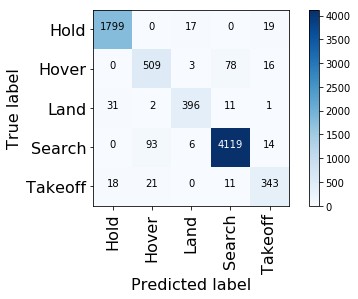

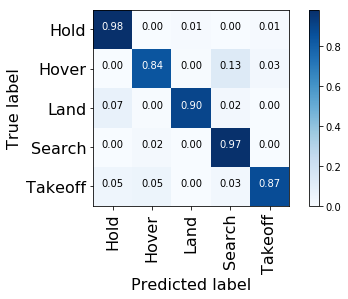

In [36]:
testY_pred = clf.predict(testX)
y_true = testY
y_pred = testY_pred

# # Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
data_class_name = ['Hold', 'Hover', 'Land', 'Search', 'Takeoff']
# # Plot non-normalized confusion matrix
plt.figure()
cm_non_normalized = plot_confusion_matrix(cnf_matrix, classes=data_class_name,
                       title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
plt.figure()
cm_normalized = plot_confusion_matrix(cnf_matrix, classes=data_class_name, normalize=True,
                       title='Normalized confusion matrix')

plt.show()

In [ ]:
# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                class_names=data_class_name,
                                out_file=None,
                                max_depth=None,
                                leaves_parallel=False,
                                filled=True,
                                rounded=True,
                                special_characters=True) 
                         
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

True

scenario accuracy:  0.998
precision:  [1.   1.   0.98 1.   1.  ]
recall:  [1.   0.98 1.   1.   1.  ]
Fscore:  [1.   0.99 0.99 1.   1.  ]
support [236  49  52 599  64]
Confusion matrix, without normalization
[[236   0   0   0   0]
 [  1  48   0   0   0]
 [  0   0  52   0   0]
 [  0   0   1 598   0]
 [  0   0   0   0  64]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.  ]
 [0.02 0.98 0.   0.   0.  ]
 [0.   0.   1.   0.   0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   1.  ]]


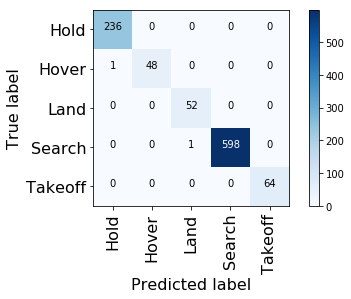

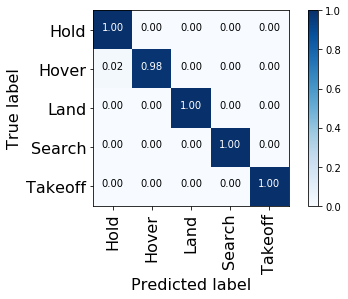

********************************REPORT********************************
The experiment follows the true scenerio  99.8 %.
Details: 
The experiment follows  Hold state     100.0 %,  
			Hover state  97.96 %,  
			Land state    100.0 %,  
			Search state   99.83 %,  
			Takeoff state     100.0 %. 
Recommendation: The following states need to be checked,  ['Hover', 'Search']
******************************END REPORT******************************


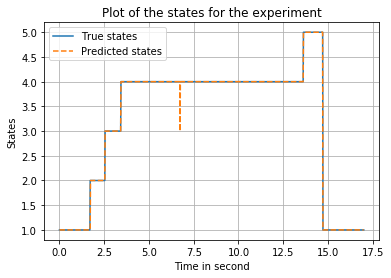

In [51]:
# check a scenerio and generate report
datascenario = pd.read_csv('dataset15.csv')
datascenario = datascenario.dropna()
scenarioX = datascenario.iloc[:,0:4]
scenarioX = scenarioX.reset_index(drop=True)
scenarioX = scenarioX.dropna()
scenarioY = datascenario.iloc[:,-1]
scenarioY = scenarioY.replace(data_class_name_num, data_class_name)
scenarioY = scenarioY.reset_index(drop=True)
scenarioY = scenarioY.dropna()

# scenarioX,scenarioY = simirisX,simirisY
trainX, testX, trainY, testY = train_test_split(scenarioX, scenarioY, 
                                                    test_size=0.1, 
                                                    random_state=np.random.randint(100))
clf = clf.fit(trainX,trainY) 

scenarioY_pred = clf.predict(scenarioX)

scenarioAccuracy = clf.score(scenarioX, scenarioY)
print('scenario accuracy: ', scenarioAccuracy)

y_true = scenarioY
y_pred = scenarioY_pred
        
precision,recall,fbeta_score,support = precision_recall_fscore_support(y_true, 
                                                                       y_pred, 
                                                                       beta=1.0, 
                                                                       labels=None, 
                                                                       pos_label=1, 
                                                                       average=None, 
                                                                       warn_for=('precision', 'recall', 'f-score'), 
                                                                       sample_weight=None)
print('precision: ', precision)
print('recall: ', recall)
print('Fscore: ', fbeta_score)
print('support', support)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

data_class_name = ['Hold', 'Hover', 'Land', 'Search', 'Takeoff']
# Plot non-normalized confusion matrix
plt.figure()
cm_non_normalized = plot_confusion_matrix(cnf_matrix, classes=data_class_name,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
cm_normalized = plot_confusion_matrix(cnf_matrix, classes=data_class_name, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

y_true = y_true.replace(data_class_name, data_class_name_num)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.replace(data_class_name, data_class_name_num)
time = np.linspace(start=0,stop=17,num=len(y_true))


reco = []
for i in range(len(data_class_name)):
    if cm_normalized[i,i] != 1.0:
        reco.append(data_class_name[i])

print('********************************REPORT********************************')
print('The experiment follows the true scenerio ', scenarioAccuracy*100,'%.')
print('Details: ')
print('The experiment follows  Hold state    ', round(cm_normalized[0,0]*100,2),'%, ',
                            '\n\t\t\tHover state ', round(cm_normalized[1,1]*100,2),'%, ',
                            '\n\t\t\tLand state   ', round(cm_normalized[2,2]*100,2),'%, ',
                            '\n\t\t\tSearch state  ', round(cm_normalized[3,3]*100,2),'%, ',
                            '\n\t\t\tTakeoff state    ', round(cm_normalized[4,4]*100,2),'%. ')
if reco:
    print('Recommendation: The following states need to be checked, ', reco)
plt.figure()
plt.plot(time, y_true,lw=1.5,label='True states')
plt.plot(time, y_pred,'--',lw=1.5,label='Predicted states')
plt.xlabel('Time in second')
plt.ylabel('States')
plt.title('Plot of the states for the experiment')
plt.legend()
plt.grid()
print('******************************END REPORT******************************')
      

# plt.plot(dataX.iloc[1:1000,3])

In [24]:
print(len(intelY), intelX.shape)

13979 (13979, 4)


In [10]:
print(totaltrainsample)

12011


In [6]:
datasamples = np.array([7901,1392,488,1000,402])
print(datasamples/sum(datasamples))

[0.70651882 0.12447465 0.04363766 0.08942144 0.03594742]


In [8]:
len(simY[simY=='Hold'])

3715

In [15]:
simX.iloc[:,1].values

array([ 0.13,  0.13,  0.13, ..., -0.08, -0.08, -0.08])

In [29]:
print(len(testY))

22948


In [17]:
pd.unique(arY)

array(['Hold', 'Takeoff', 'Hover', 'Search', 'Land'], dtype=object)

In [18]:
pd.unique(intelY)

array(['Hold', 'Takeoff', 'Hover', 'Land', 'Search'], dtype=object)

In [21]:
pd.unique(simconcatY)

array(['Hold', 'Takeoff', 'Hover', 'Search', 'Land'], dtype=object)